#### Coding Exercises

There are three datasets that have been provided
SalesData.xlsx
imdb.csv
diamonds.csv


The candidate will be utilizing them to answer the below given questions. Also provided along is Python and R answer template. 

Please fill in the attached template
with respective fucntions codes.


##### Packages for Python

In [1]:
import pandas as pd


#### Questions 1 - 6 Utilize the sales data set.
The sales data contians transactional sales information for each sales person. It also contains the date of sales, item sold , price
of each item, sales amount, region and their corresponding manager information.


In [2]:
df=pd.read_excel("SaleData.xlsx")

In [3]:
df.head()

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
0,2018-01-06,East,Martha,Alexander,Television,95,1198.0,113810.0
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50,500.0,25000.0
2,2018-02-09,Central,Hermann,Luis,Television,36,1198.0,43128.0
3,2018-02-26,Central,Timothy,David,Cell Phone,27,225.0,6075.0
4,2018-03-15,West,Timothy,Stephen,Television,56,1198.0,67088.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderDate   43 non-null     datetime64[ns]
 1   Region      43 non-null     object        
 2   Manager     43 non-null     object        
 3   SalesMan    43 non-null     object        
 4   Item        43 non-null     object        
 5   Units       43 non-null     int64         
 6   Unit_price  43 non-null     float64       
 7   Sale_amt    43 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 2.8+ KB


In [5]:
df.isnull().sum()# we can assure that there are no null values in dataset

OrderDate     0
Region        0
Manager       0
SalesMan      0
Item          0
Units         0
Unit_price    0
Sale_amt      0
dtype: int64

##### 1). Find the least amount sale that was done for each item.

In [6]:
df['Item'].unique()

array(['Television', 'Home Theater', 'Cell Phone', 'Desk', 'Video Games'],
      dtype=object)

In [7]:
df.groupby('Item')['Sale_amt'].min().reset_index()

,Item,Sale_amt
0,Cell Phone,3375.0
1,Desk,250.0
2,Home Theater,2000.0
3,Television,8386.0
4,Video Games,936.0


##### 2)Compute the total sales for each year and region across all items

In [8]:
df['years']=df['OrderDate'].dt.year

df.groupby(['years','Region'])['Sale_amt'].sum().reset_index()

,years,Region,Sale_amt
0,2018,Central,479825.0
1,2018,East,293780.0
2,2018,West,105424.0
3,2019,Central,349944.5
4,2019,East,27227.0
5,2019,West,49475.0


##### 3)Create new column 'days_diff' with number of days difference between reference date passed and each order date


In [9]:
ref_date=pd.to_datetime("11-12-2022")
df['days_diff']=ref_date-df['OrderDate']
df.head()


,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt,years,days_diff
0,2018-01-06,East,Martha,Alexander,Television,95,1198.0,113810.0,2018,1771 days
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50,500.0,25000.0,2018,1754 days
2,2018-02-09,Central,Hermann,Luis,Television,36,1198.0,43128.0,2018,1737 days
3,2018-02-26,Central,Timothy,David,Cell Phone,27,225.0,6075.0,2018,1720 days
4,2018-03-15,West,Timothy,Stephen,Television,56,1198.0,67088.0,2018,1703 days


#####  Create a dataframe with two columns: 'manager', 'list_of_salesmen'. Column 'manager' will contain the unique managers present and column 'list_of_salesmen' will contain an array of all salesmen under each manager.

In [10]:
list_of_salesmen=df.groupby('Manager')['SalesMan'].unique()
df_new=pd.DataFrame(list_of_salesmen)
df_new


,SalesMan
Manager,
Douglas,"[Michael, Karen, John]"
Hermann,"[Shelli, Luis, Sigal]"
Martha,"[Alexander, Steven, Diana]"
Timothy,"[David, Stephen]"


###### For all regions find number of salesman and total sales. Return as a dataframe with three columns - Region, salesmen_count and total_sales

In [11]:
df_new2=df.groupby('Region').agg({'SalesMan':['count'],"Sale_amt":["sum"]}).reset_index()
df_new2


,Region,SalesMan,Sale_amt
,,count,sum
0,Central,24,829769.5
1,East,13,321007.0
2,West,6,154899.0


In [12]:
df_new2.columns=['Region','salesmen_count','total_sales']
df_new2

,Region,salesmen_count,total_sales
0,Central,24,829769.5
1,East,13,321007.0
2,West,6,154899.0


##### 6.Create a dataframe with total sales as percentage for each manager. Dataframe to contain manager and percent_sales

In [13]:
total_sale=df['Sale_amt'].sum()

In [14]:
df_manager=df.groupby('Manager')['Sale_amt'].sum().reset_index()
df_manager.columns=['manager','percentage_of_total_sale']

In [15]:
df_manager['percentage_of_total_sale']=df['Sale_amt']/total_sale*100 #to find the percentage
df_manager

,manager,percentage_of_total_sale
0,Douglas,8.716561
1,Hermann,1.914718
2,Martha,3.303118
3,Timothy,0.465276


### Questions 7 - 10 Utilize the imdb data set (duration is in seconds)

##### The imdb data contains the rating and other information related to movies and episodes across a lot of generes and years.


##### 1)Get the imdb rating for fifth movie of dataframe


In [16]:
imdb_rating=pd.read_csv('imdb.csv',escapechar="\\")
imdb_rating.head()

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
0,titles01/tt0012349,tt0012349,Der Vagabund und das Kind (1921),der vagabund und das kind,http://www.imdb.com/title/tt0012349/,8.4,40550.0,3240.0,1921.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
1,titles01/tt0015864,tt0015864,Goldrausch (1925),goldrausch,http://www.imdb.com/title/tt0015864/,8.3,45319.0,5700.0,1925.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
2,titles01/tt0017136,tt0017136,Metropolis (1927),metropolis,http://www.imdb.com/title/tt0017136/,8.4,81007.0,9180.0,1927.0,video.movie,...,0,0,0,1,0,0,0,0,0,0
3,titles01/tt0017925,tt0017925,Der General (1926),der general,http://www.imdb.com/title/tt0017925/,8.3,37521.0,6420.0,1926.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
4,titles01/tt0021749,tt0021749,Lichter der Großstadt (1931),lichter der gro stadt,http://www.imdb.com/title/tt0021749/,8.7,70057.0,5220.0,1931.0,video.movie,...,0,0,1,0,0,0,0,0,0,0


In [17]:
imdb_rating['imdbRating'].iloc[5]# imbd rating of the 5th column

8.5

##### 2)Return titles of movies with shortest and longest run time


In [18]:
imdb_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14761 entries, 0 to 14760
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fn                14761 non-null  object 
 1   tid               14761 non-null  object 
 2   title             14761 non-null  object 
 3   wordsInTitle      14748 non-null  object 
 4   url               14761 non-null  object 
 5   imdbRating        13551 non-null  float64
 6   ratingCount       13551 non-null  float64
 7   duration          13745 non-null  float64
 8   year              14731 non-null  float64
 9   type              14761 non-null  object 
 10  nrOfWins          14761 non-null  int64  
 11  nrOfNominations   14761 non-null  int64  
 12  nrOfPhotos        14761 non-null  int64  
 13  nrOfNewsArticles  14761 non-null  int64  
 14  nrOfUserReviews   14761 non-null  int64  
 15  nrOfGenre         14761 non-null  int64  
 16  Action            14761 non-null  int64 

In [19]:
imdb_rating.isnull().sum()

fn                     0
tid                    0
title                  0
wordsInTitle          13
url                    0
imdbRating          1210
ratingCount         1210
duration            1016
year                  30
type                   0
nrOfWins               0
nrOfNominations        0
nrOfPhotos             0
nrOfNewsArticles       0
nrOfUserReviews        0
nrOfGenre              0
Action                 0
Adult                  0
Adventure              0
Animation              0
Biography              0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Family                 0
Fantasy                0
FilmNoir               0
GameShow               0
History                0
Horror                 0
Music                  0
Musical                0
Mystery                0
News                   0
RealityTV              0
Romance                0
SciFi                  0
Short                  0
Sport                  0


In [20]:
imdb_rating[imdb_rating['duration']==imdb_rating['duration'].max()]['title']


7535    Baseball The National Pastime (TV Episode 1994)
Name: title, dtype: object

In [21]:
imdb_rating[imdb_rating['duration']==imdb_rating['duration'].min()]['title']

13682    Traffic Crossing Leeds Bridge (1888)
Name: title, dtype: object

##### Sort the data frame by in the order of when they where released and have higer ratings, Hint : release_date (earliest) and Imdb rating(highest to lowest)

In [22]:
imdb_rating.sort_values(['year','imdbRating'],ascending=[True,False])

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
14013,titles04/index.html.8647,tt0392728,Roundhay Garden Scene (1888),roundhay garden scene,http://www.imdb.com/title/tt0392728/,7.8,2931.0,NaN,1888.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
13682,titles04/index.html.8070,tt0343112,Traffic Crossing Leeds Bridge (1888),traffic crossing leeds bridge,http://www.imdb.com/title/tt0343112/,7.2,1442.0,2.0,1888.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
14125,titles04/index.html.8877,tt0416046,"Monkeyshines, No. 2 (1890)",monkeyshines no,http://www.imdb.com/title/tt0416046/,5.4,383.0,NaN,1890.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
6909,titles04/index.html,tt0000005,Blacksmith Scene (1893),blacksmith scene,http://www.imdb.com/title/tt0000005/,6.3,1039.0,60.0,1893.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
12691,titles04/index.html.6501,tt0177707,Dickson Experimental Sound Film (1894),dickson experimental sound film,http://www.imdb.com/title/tt0177707/,6.8,965.0,22.0,1894.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8870,titles04/index.html.13318,tt1922570,Icarus Factor,icarus factor,http://www.imdb.com/title/tt1922570/,NaN,NaN,NaN,NaN,video.movie,...,0,0,0,0,0,0,0,1,0,0
8907,titles04/index.html.13388,tt1965235,Thomas the Tank Engine,thomas the tank engine,http://www.imdb.com/title/tt1965235/,NaN,NaN,NaN,NaN,video.movie,...,0,0,0,0,0,0,0,0,0,0
9388,titles04/index.html.14214,tt2761156,"Patrik, Age 1.5",patrik age,http://www.imdb.com/title/tt2761156/,NaN,NaN,NaN,NaN,video.movie,...,0,0,0,0,0,0,0,0,0,0
14485,titles04/index.html.9493,tt0472429,Voltron,voltron,http://www.imdb.com/title/tt0472429/,NaN,NaN,NaN,NaN,video.movie,...,0,0,0,0,0,0,0,0,0,0


##### Subset the dataframe with movies having the following prameters.(duration between 30 mintues to 180 minutes)


In [23]:
imdb_rating[(imdb_rating['duration']>30)&(imdb_rating['duration']<180)]
 

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
1362,titles02/index.html.4822,tt3297996,The Twenty-Eight Hits for Laughs Who the Hell ...,the twenty eight hits for laughs who the hell ...,http://www.imdb.com/title/tt3297996/,7.3,10.0,60.0,2011.0,video.episode,...,0,0,0,0,0,0,0,0,0,0
2519,titles03/index.html.1911,tt0091455,Die kleine Lampe (1986),die kleine lampe,http://www.imdb.com/title/tt0091455/,7.5,5793.0,120.0,1986.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
3377,titles03/index.html.3047,tt0191831,Bigfoot (1967),bigfoot,http://www.imdb.com/title/tt0191831/,7.3,198.0,60.0,1967.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
4010,titles03/index.html.3854,tt0373262,Recruiting a Digital Army (Video 2000),recruiting a digital army video,http://www.imdb.com/title/tt0373262/,NaN,NaN,60.0,2000.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
5578,titles03/index.html.5718,tt1443387,Cavalcade of Cartoon Comedy Things You Never H...,cavalcade of cartoon comedy things you never h...,http://www.imdb.com/title/tt1443387/,6.6,15.0,120.0,2009.0,video.episode,...,0,0,0,0,0,0,0,0,0,0
5584,titles03/index.html.5723,tt1447181,My Left Sock (2003),my left sock,http://www.imdb.com/title/tt1447181/,NaN,NaN,120.0,2003.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
5685,titles03/index.html.5837,tt1549133,Un Parisien à New York (2007),un parisien new york,http://www.imdb.com/title/tt1549133/,NaN,NaN,120.0,2007.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
6216,titles03/index.html.6396,tt2086872,"Live Free or Die Hard (Project 12, 8/12) (2011)",live free or die hard project,http://www.imdb.com/title/tt2086872/,7.1,10.0,60.0,2011.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
6463,titles03/index.html.6665,tt2553180,Bum Reviews Die Hard (TV Episode 2012),bum reviews die hard tv episode,http://www.imdb.com/title/tt2553180/,NaN,NaN,120.0,2012.0,video.episode,...,0,0,0,0,1,0,0,0,0,0
6528,titles03/index.html.6733,tt2914030,Movie Friends: Prashant Prabhakar (2013),movie friends prashant prabhakar,http://www.imdb.com/title/tt2914030/,NaN,NaN,120.0,2013.0,video.movie,...,0,0,0,0,1,0,0,0,0,0


### Questions 11 - 15 Utilize the diamonds data set.

##### Questions 11 - 15 Utilize the diamonds data set.

##### 11. Count the duplicate rows of diamonds DataFrame.


In [28]:
diamonds_df=pd.read_csv("diamonds.csv")

In [29]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [30]:
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53942 non-null  object 
 1   cut      53942 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53939 non-null  float64
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53940 non-null  object 
dtypes: float64(5), object(5)
memory usage: 4.1+ MB


In [31]:
diamonds_df.isnull().sum()

carat      1
cut        1
color      0
clarity    0
depth      0
table      0
price      4
x          0
y          0
z          3
dtype: int64

In [34]:
diamonds_df.drop_duplicates()# it indicates the number of duplicate columns

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.5
53939,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53940,0.7,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53941,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


In [42]:
len(diamonds_df)-len(diamonds_df.drop_duplicates()) #either this or the other method mentioned below

149

In [40]:
diamonds_df.duplicated( keep='first').sum() #another method

149

##### 12. Drop rows in case of missing values in carat and cut columns

In [46]:
diamonds_df.dropna(axis=0,subset=['carat','cut'],how='any')

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.5
53939,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53940,0.7,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53941,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


##### Subset the dataframe with only numeric columns

In [66]:
diamonds_df.select_dtypes('number')

,depth,table,price,x,y
0,61.5,55.0,326.0,3.95,3.98
1,59.8,61.0,326.0,3.89,3.84
2,56.9,65.0,327.0,4.05,4.07
3,62.4,58.0,334.0,4.20,4.23
4,63.3,58.0,335.0,4.34,4.35
...,...,...,...,...,...
53938,60.8,57.0,2757.0,5.75,5.76
53939,63.1,55.0,2757.0,5.69,5.75
53940,62.8,60.0,2757.0,5.66,5.68
53941,61.0,58.0,2757.0,6.15,6.12


In [67]:
type(diamonds_df['carat'].iloc[3])# carat is not included because it is of string data type

str

In [71]:
import numpy as np

##### Compute volume as (xyz) when depth is greater than 60. In case of depth less than 60 default volume to 8

In [85]:
type(diamonds_df['z'].iloc[0])

str

In [99]:
diamonds_df['z'].isnull().sum()

3

In [114]:
#convert string type to int
diamonds_df['z']=pd.to_numeric(diamonds_df['z'],errors='coerce')#coerce type is very important

In [112]:
type(diamonds_df['z'].iloc[0])

numpy.float64

In [117]:
diamonds_df['volume']=np.where(diamonds_df['depth']>60,diamonds_df['x']*diamonds_df['y']*diamonds_df['z'],8)
diamonds_df

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,8.000000
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,8.000000
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...
53938,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50,115.920000
53939,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61,118.110175
53940,0.7,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56,114.449728
53941,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74,140.766120


##### 15. Impute missing price values with mean.

In [121]:
diamonds_df['price'].fillna(diamonds_df['price'].mean(),inplace=True)

In [123]:
diamonds_df['price'].isnull().sum() #the  empty values are filled with mean of price

0

### Bonus questions (Optional)
The bonus questions utilize the same data sets and if answere need to be filled in the respetive template



##### 1)Generate a report that tracks the various Genere combinations for each type year on year. The result data frame should contain type, Genere_combo, year,avg_rating, min_rating, max_rating, total_run_time_mins


In [145]:
imdb_rating.columns

Index(['fn', 'tid', 'title', 'wordsInTitle', 'url', 'imdbRating',
       'ratingCount', 'duration', 'year', 'type', 'nrOfWins',
       'nrOfNominations', 'nrOfPhotos', 'nrOfNewsArticles', 'nrOfUserReviews',
       'nrOfGenre', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'FilmNoir', 'GameShow', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport',
       'TalkShow', 'Thriller', 'War', 'Western'],
      dtype='object')

In [146]:
imdb_rating['imdbRating'].describe()

count    13551.000000
mean         6.865707
std          1.119515
min          1.000000
25%          6.300000
50%          7.000000
75%          7.600000
max          9.900000
Name: imdbRating, dtype: float64

<AxesSubplot:>

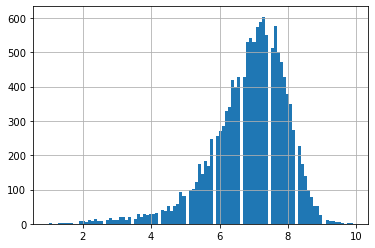

In [152]:
imdb_rating['imdbRating'].hist(bins=100)# centred distribution-distribution around the mean

In [233]:
year_unique=imdb_rating['year'].unique()
year_unique
genre_columns=imdb_rating.pivot(index=year_unique,columns='type',values='Action'),
genre_columns


KeyError: 1921.0

In [165]:
imdb_report=pd.DataFrame()
imdb_report.columns=['type','year','genre_combo','avg_rating','min_rating','max_rating','total_time']


ValueError: Length mismatch: Expected axis has 0 elements, new values have 7 elements

In [217]:
condition=imdb_rating[imdb_rating.iloc[:16:]==1].iloc[:,16:]
combo=condition.columns==1




array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])